### *Imports necesarios para el proyecto*

In [1]:
from keras.utils import load_img
import matplotlib.pyplot as plt
import requests
import pickle
import os

%matplotlib inline

### *Visualización de las imagenes que se van a enviar en las peticiones a la API*

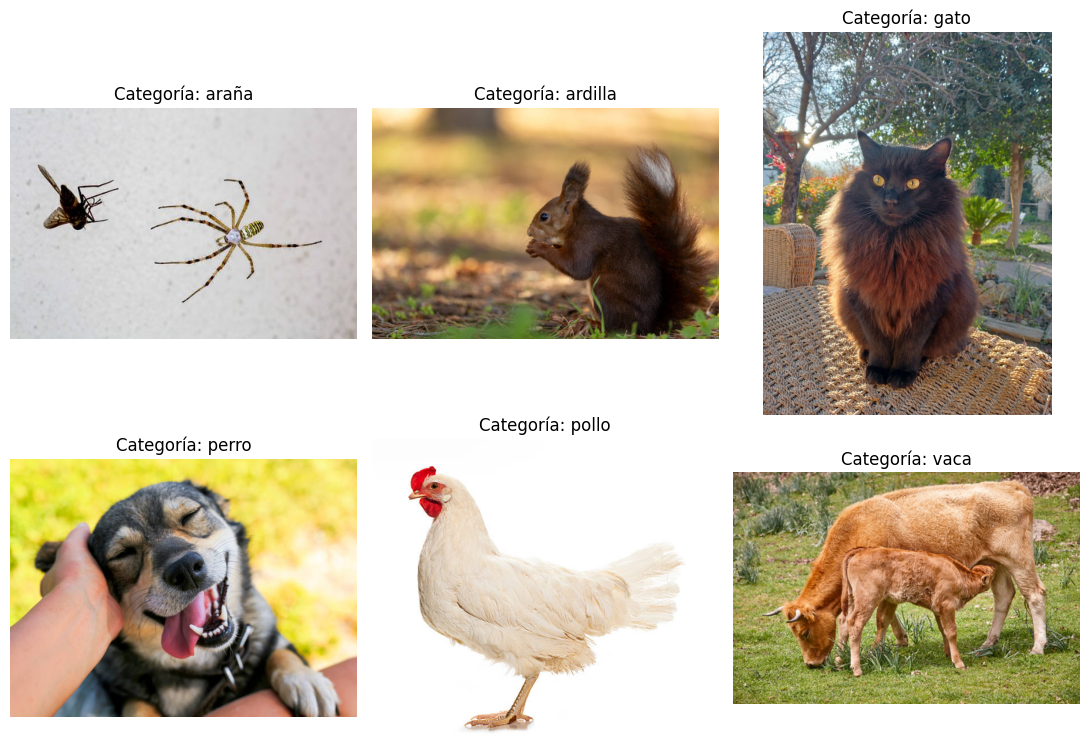

In [2]:
fig, axes = plt.subplots(2, 3, figsize=(11, 8))
axes = axes.ravel()

image_files = os.listdir('images')

for ax, filename in zip(axes, image_files):
    img = load_img(os.path.join('images', filename))
    ax.imshow(img)
    ax.set_title(f"Categoría: {filename.split('.')[0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### *Resultado de las peticiones*

In [3]:
url = 'http://127.0.0.1:5000/predict'

with open('class_indices.pkl', 'rb') as f:
    class_indices = pickle.load(f)

idx_to_class = {k: v for k, v in class_indices.items()}
print('Number corresponding to each class:\n', idx_to_class, '\n')
    
for img in os.listdir('images'):
    img_path = os.path.join('images', img)
    with open(img_path, 'rb') as f:
        files = {'image': f}
        response = requests.post(url, files=files).json()

    print('Correct answer:', img.split('.')[0])
    print('Model response:', response, '\n')

Number corresponding to each class:
 {'araña': 0, 'ardilla': 1, 'caballo': 2, 'elefante': 3, 'gato': 4, 'mariposa': 5, 'oveja': 6, 'perro': 7, 'pollo': 8, 'vaca': 9} 

Correct answer: araña
Model response: {'prediction': 0} 

Correct answer: ardilla
Model response: {'prediction': 1} 

Correct answer: gato
Model response: {'prediction': 4} 

Correct answer: perro
Model response: {'prediction': 7} 

Correct answer: pollo
Model response: {'prediction': 8} 

Correct answer: vaca
Model response: {'prediction': 9} 

